<a href="https://colab.research.google.com/github/minhe8564/Assignment/blob/main/Machine-learning/231102_Basecode_Perceptron_MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패키지 선언

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader

## Dataset 다운로드

In [2]:
# Training dataset 다운로드
mnist_train = dataset.MNIST(root = "./",
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
mnist_test = dataset.MNIST(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 41749807.94it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 105518897.06it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36976653.42it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19639720.38it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## MNIST 데이터셋 형상 확인

60000
torch.Size([1, 28, 28])
5


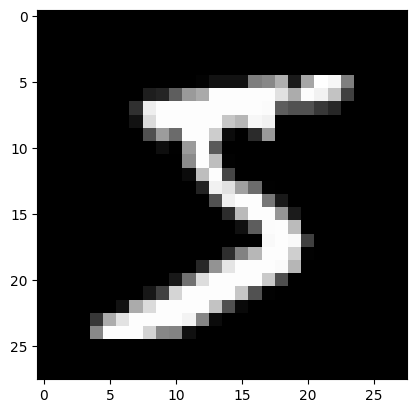

In [3]:
import matplotlib.pyplot as plt
print(len(mnist_train))     # training dataset 개수 확인

first_data = mnist_train[0]
print(first_data[0].shape)  # 첫번째 data의 형상 확인
print(first_data[1])        # 첫번째 data의 정답 확인

plt.imshow(first_data[0][0,:,:], cmap='gray')
plt.show()

In [4]:
# 2D 형태 이미지의 전처리 -> 평탄화
first_img = first_data[0]
print(first_img.shape)

first_img = first_img.view(-1, 28*28) # 이미지 평탄화 수행 2D -> 1D
print(first_img.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


## Single Layer Perceptron 모델 정의


In [5]:
class SLP(nn.Module):

  def __init__(self):
    super(SLP, self).__init__()
    # SLP의 입력은 784개, 출력은 10개
    self.fc = nn.Linear(in_features=784, out_features=10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    y = self.fc(x)
    return y

## Multi Layer Perceptron 모델 정의 (2-layer)
Single layer의 성능보다 약 5% 높은 성능

In [6]:
class MLP(nn.Module):

  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(in_features=784, out_features=100)
    self.fc2 = nn.Linear(in_features=100, out_features=100)
    self.fc3 = nn.Linear(in_features=100, out_features=100)
    self.fc4 = nn.Linear(in_features=100, out_features=100)
    self.fc5 = nn.Linear(in_features=100, out_features=10)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self, x):
    x = x.view(-1,28*28)
    y = self.relu(self.fc1(x))
    y = self.relu(self.fc2(y))
    y = self.relu(self.fc3(y))
    y = self.relu(self.fc4(y))
    y = self.fc5(y)
    return y


## Hyper-parameters 지정

In [7]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
# network = SLP()
network = MLP()
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

# Batch 단위 학습을 위해 DataLoader 함수 사용
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## Perceptron 학습을 위한 반복문 선언

In [8]:
# 전체 데이터에 대한 반복
for epoch in range(training_epochs):
  network.train()
  avg_cost = 0
  total_batch = len(data_loader)

  # 1 epoch 내의 배치에 대한 반복: iteration
  for img, label in data_loader:

    pred = network(img) # 입력 이미지에 대해 forward pass

    loss = loss_function(pred, label) # 예측 값, 정답을 이용해 loss 계산
    optimizer.zero_grad() # gradient 초기화
    loss.backward() # 모든 weight에 대해 편미분 값 계싼
    optimizer.step() # 파라미터 업데이트

    # 모든 배치에 대한 평균 loss 값 계산
    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 1.242178
Epoch: 2 Loss = 0.258820
Epoch: 3 Loss = 0.156302
Epoch: 4 Loss = 0.114838
Epoch: 5 Loss = 0.091188
Epoch: 6 Loss = 0.078391
Epoch: 7 Loss = 0.065147
Epoch: 8 Loss = 0.056391
Epoch: 9 Loss = 0.047196
Epoch: 10 Loss = 0.040347
Epoch: 11 Loss = 0.037989
Epoch: 12 Loss = 0.031058
Epoch: 13 Loss = 0.027149
Epoch: 14 Loss = 0.023575
Epoch: 15 Loss = 0.022156
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [9]:
network.eval()
img_test = mnist_test.data.float()
label_test = mnist_test.targets

with torch.no_grad(): # test에서는 기울기 계산 제외
  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test # 예측 값이 가장 높은 숫자와 정답데이터가 일치한 지 확인
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9677000045776367


## 예측 결과 확인

tensor([[ -847.6064,  1560.9873,  4403.9917,  1497.8313, -1663.3324, -1600.2131,
         -1464.0164,  1255.0507,   731.7065, -3220.5649]])
tensor([2])


<function matplotlib.pyplot.show(close=None, block=None)>

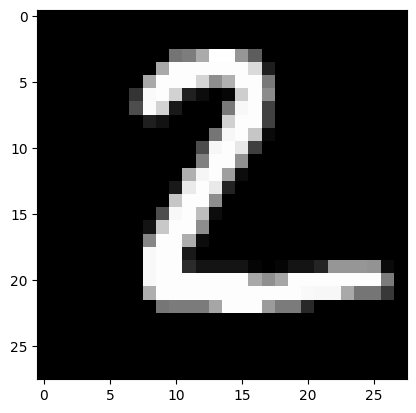

In [10]:
first_data = mnist_test.data[1]

with torch.no_grad():
  prediction = network(first_data.float())

prediction_num = torch.argmax(prediction, 1)

print(prediction)
print(prediction_num)
plt.imshow(first_data, cmap="gray")
plt.show